#### Importing necessary Libraries and warnings

In [175]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
from sklearn.preprocessing import MinMaxScaler

In [178]:
from sklearn.feature_selection import RFE

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
import statsmodels.api as sm

In [182]:
from sklearn.metrics import r2_score

In [183]:
from sklearn import metrics

####  Reading the bikes rental  dataset into 'bikes' dataframe

In [184]:
#Importing the dataset into a dataframe
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
#Shape of the bikes dataset
bikes.shape

(730, 16)

In [186]:
#Descriptive statistics of the bikes dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [187]:
#Looking through the null values if present and their datatypes
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<AxesSubplot:>

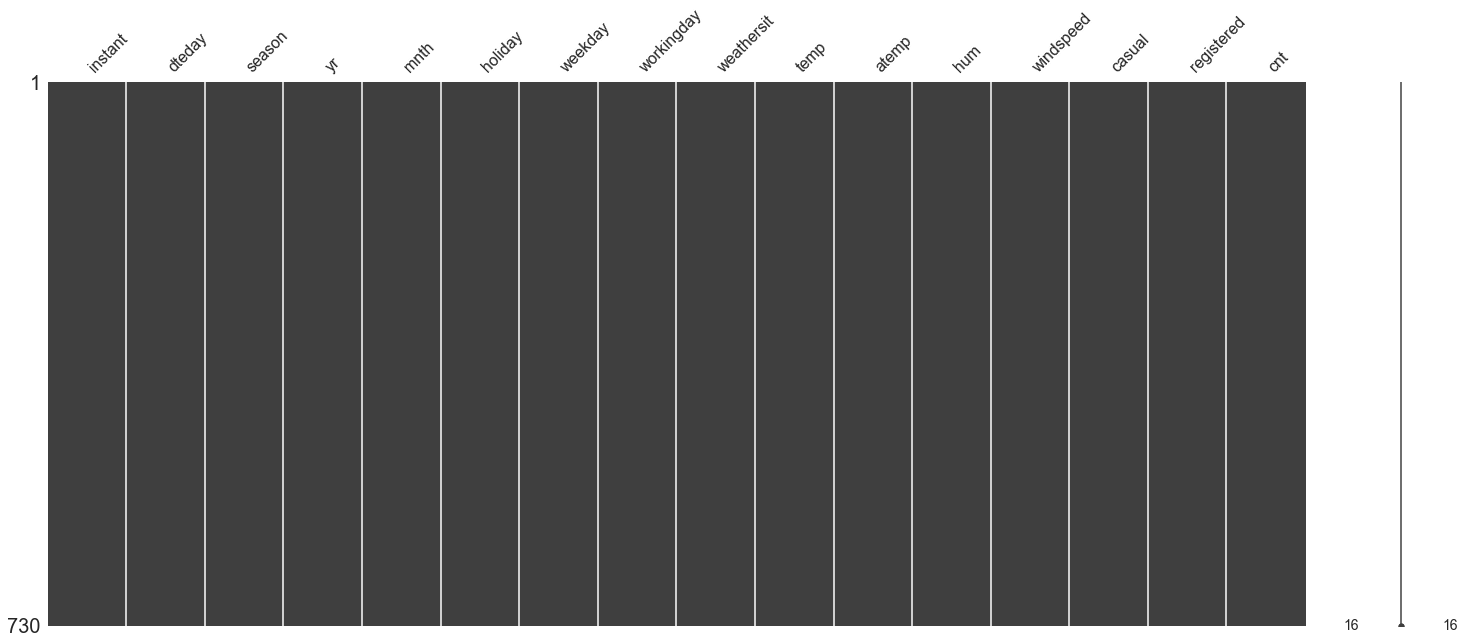

In [188]:
#To check any missing values
import missingno as mn
mn.matrix(bikes)

#### Obs: There are no missing values here

- categorical columns(season, month,weathersit,weekday)
- continuous columns(windspeed,hum,temp,atemp,count)
- binary columns(yr, holiday, workingday)


##### The unnecessary columns are (instant,dteday,casual,registered)

- Dropping columns(instant,dteday,casual,registered)

In [189]:
cols=['instant','dteday','casual','registered']
bikes=bikes.drop(columns=cols,axis=1)

In [190]:
#Re-naming columns
bikes.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

#### Mapping the Categorical columns
1) Season column
- [1] spring,
- [2] summer, 
- [3] fall, 
- [4] winter

In [191]:
season_cat={1:'spring',2:'summer',3:'fall',4:'winter'}
bikes.season=[season_cat[item] for item in bikes.season]

2) weathersit column
- [1]clear,
- [2],mist and cloudy,
- [3]light rain and snow,
- [4]heavy rain and snow

In [192]:
weather_cat={1:'clear',2:'mist and cloudy',3:'light rain and snow',4:'heavy rain and snow'}
bikes.weathersit=[weather_cat[item] for item in bikes.weathersit]

3) month column

In [193]:
month_cat={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec',}
bikes.month=[month_cat[item] for item in bikes.month]

4) weekday column

In [194]:
wkday_cat={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',}
bikes.weekday=[wkday_cat[item] for item in bikes.weekday]

5) Year column

In [195]:
yr_cat={0:'2018',1:'2019'}
bikes.year=[yr_cat[item] for item in bikes.year]

# EDA

#### Analysis of various variables with respect to (count) i.e target variable throughVisualization


1) Season

<AxesSubplot:xlabel='season', ylabel='count'>

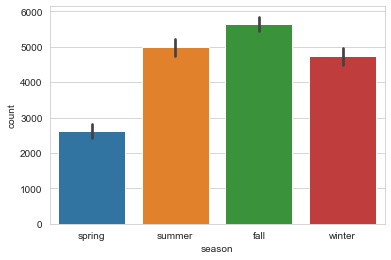

In [196]:
sns.barplot(x='season',y='count',data=bikes)

#### Obs: Bikes are rented more during the fall season

2) Year
- [0]2018,
- [1]2019

Analysing the demand in 2018 and 2019 year

<AxesSubplot:xlabel='year', ylabel='count'>

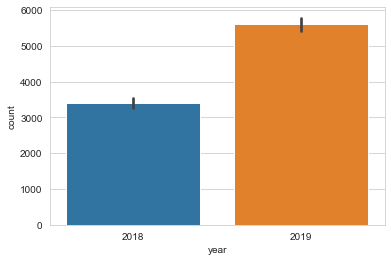

In [197]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='count',data=bikes)

#### Obs:bikes are rented more in the year2019 as compared to 2018

3) month


Analysing the demand in various months

<AxesSubplot:xlabel='month', ylabel='count'>

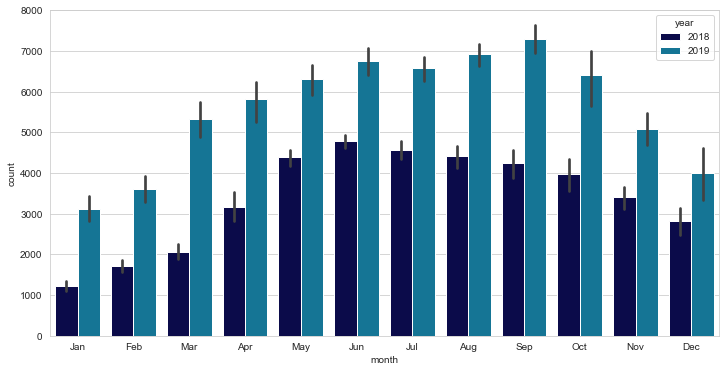

In [198]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=bikes,hue='year',palette='ocean')

4) weather


Analysing the demand in various weather

<AxesSubplot:xlabel='weathersit', ylabel='count'>

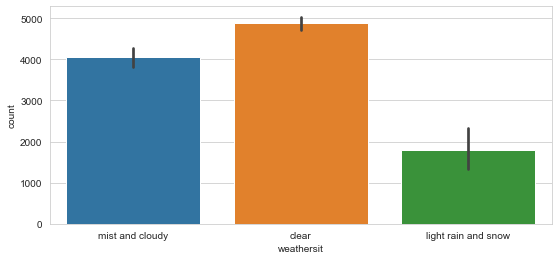

In [199]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='count',data=bikes)

#### Obs: Bikes are rented more in the clear weather 

5) weekday

 Analysing the demand in various weekdays

<AxesSubplot:xlabel='weekday', ylabel='count'>

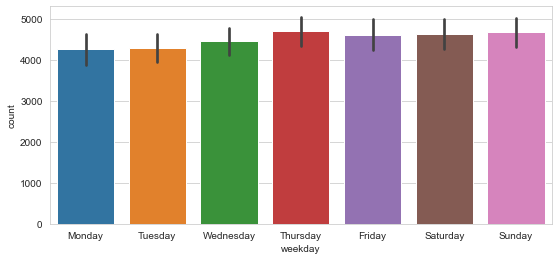

In [200]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='count',data=bikes)

#### Obs: Bikes are rented more on Saturday and Friday

6) Working day
- [0]holiday,
- [1]working day

Analysing the demand based on the working day or a weekday

<AxesSubplot:xlabel='workingday', ylabel='count'>

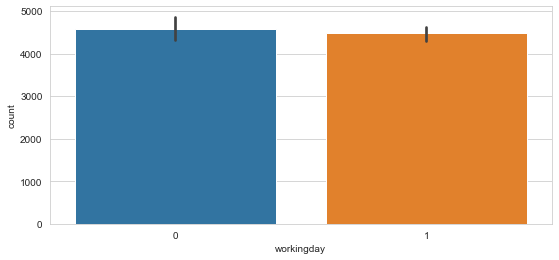

In [201]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='count',data=bikes)

#### Obs: bikes are rented more on working days

# Visualising the continuous variables (temp,atemp,humidity,windspeed) with respect to the count variable using pairplot

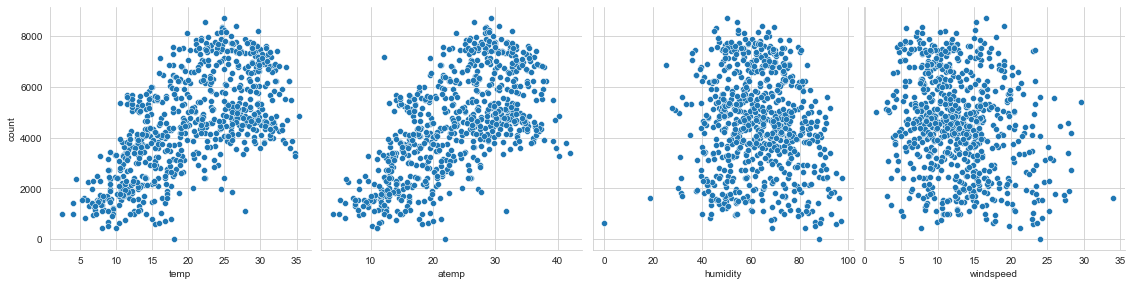

In [202]:
sns.pairplot(bikes, x_vars=['temp','atemp','humidity','windspeed'], y_vars='count',size=4,aspect=1)
plt.show()

## Obs:

`- Bike rental count shows a positive correlation with temp and atemp and thereby bike rental counts increase at higher temperatures and vice-versa`

- bike rental counts show a neagtive correlation with humidity and therby bike rental counts are less at high humidity levels and vice-versa

- bike rental counts show a negative correaltion with windspeed and thereby bike rental counts are less at high windspeed and vice-versa

## Checking the correlations among variables

<AxesSubplot:>

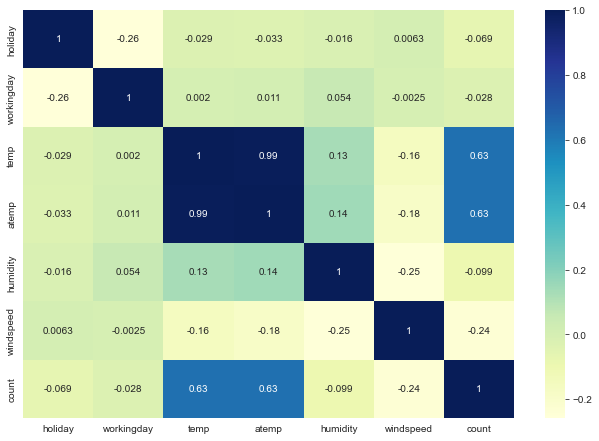

In [203]:
plt.figure(figsize=(11,7.5))
sns.heatmap(bikes.corr(),annot=True,cmap='YlGnBu')

#### Obs: It is seen that the variables (temp) and (atemp) have a high correlation value of 0.99. i.e they are highly correlated to each other therefore we need to drop one of them

In [204]:
#dropping the variable(temp)
bikes=bikes.drop('atemp',axis=1)

# Data Preparation


1) Creating dummy variables for the categorical variables
-    month,
-    season,
-    weathersit,
-    weekday


2) Creating dummy variables for the variables 
-    month,
-    season,
-    weathersit,
-    weekday


3) Storing them in new variable 
-    months,
-    seasons,
-    weather,
-    weekdays)


4) Dropping the first column from these varibales using
 'drop_first=True'

In [205]:
months=pd.get_dummies(bikes['month'],drop_first=True,prefix='month')

seasons=pd.get_dummies(bikes['season'],drop_first=True,prefix='season')

weather=pd.get_dummies(bikes['weathersit'],drop_first=True,prefix='weather')

weekdays=pd.get_dummies(bikes['weekday'],drop_first=True,prefix='day')

years=pd.get_dummies(bikes['year'],drop_first=True,prefix='year')


#### Add the above created dummy variables to the original bikes dataframe

In [206]:
bikes=pd.concat([bikes,months,seasons,weather,weekdays,years],axis=1)
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,spring,2018,Jan,0,Monday,1,mist and cloudy,14.110847,80.5833,10.749882,...,0,0,1,1,0,0,0,0,0,0
1,spring,2018,Jan,0,Tuesday,1,mist and cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,1,0,0
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,1,0
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


#### The dummy variables are created above for the categorical variables now we need to drop them

In [207]:
bikes.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)

In [208]:
bikes.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [209]:
bikes.shape

(730, 29)

# Splitting the data into training and test sets

In [210]:
bikes_train, bikes_test = train_test_split(bikes,train_size=0.7,test_size=0.3,random_state=100)

In [211]:
#the shape of the dataset(training set)
bikes_train.shape

(510, 29)

In [212]:
bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,19.201653,55.8333,12.208807,7534,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
576,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,0,0,16.980847,62.1250,10.792293,4066,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
728,0,1,10.489153,48.3333,23.500518,1796,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,15.443347,48.9583,8.708325,4220,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [213]:
#the shape of the dataset(test set)
bikes_test.shape

(219, 29)

In [214]:
bikes_test.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
184,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,0,1,32.082500,59.2083,7.625404,6211,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0,0,19.270000,81.2917,13.250121,2659,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
221,0,1,31.433347,42.4167,13.417286,4780,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,30.5000,19.583229,4968,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Scaling the features

In [215]:
scaler=MinMaxScaler()

In [216]:
#Applying scaler on continuous column:(windspeed,temp,humidity,count)

vars=['windspeed','temp','humidity','count']

bikes_train[vars] =scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


#### Dividing into X and Y sets for the model building


In [217]:
y_train =bikes_train.pop('count')
x_train =bikes_train

In [218]:
bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,...,season_winter,weather_light rain and snow,weather_mist and cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.575354,0.300794,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
576,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
426,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
728,0,1,0.245101,0.498067,0.663106,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


# Data Modelling and Evaluation


Mixed Approach will be used for model building (firstly 15 variables to be used for the automated approach of RFE and then using Manual Approach for removing variables one by one based on the p-values and the VIF Values


Later we will use Linear Regression from ScikitLearn library for its compatibility with RFE(Recursive Freature Elimination which is the utility from sklearn library)

## RFE
#### (Recursive Feature Elimination)

In [220]:

Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train, y_train)

np.random.seed(0)
    
R_F_E = RFE(Linear_Regression,n_features_to_select=15)            
R_F_E = R_F_E.fit(x_train, y_train)


In [221]:
list(zip(x_train.columns,R_F_E.support_,R_F_E.ranking_)) 

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_light rain and snow', True, 1),
 ('weather_mist and cloudy', True, 1),
 ('day_Monday', False, 8),
 ('day_Saturday', False, 4),
 ('day_Sunday', False, 5),
 ('day_Thursday', False, 12),
 ('day_Tuesday', False, 7),
 ('day_Wednesday', False, 10),
 ('year_2019', True, 1)]

In [222]:
col = x_train.columns[R_F_E.support_]
col

Index(['holiday', 'temp', 'humidity', 'windspeed', 'month_Dec', 'month_Jan',
       'month_Jul', 'month_Nov', 'month_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weather_light rain and snow',
       'weather_mist and cloudy', 'year_2019'],
      dtype='object')

# Building model

In [223]:
x_train_R_F_E =x_train[col]


In [224]:
#adding the constant variable since it is not included in the equation
x_train_R_F_E=sm.add_constant(x_train_R_F_E)

In [225]:
#Running the linear model
Linear_Regression=sm.OLS(y_train,x_train_R_F_E).fit()

### Model 1

In [226]:
#Summary of the above model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          3.34e-189
Time:                        16:57:45   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3202      0.036      8.886      0.000       0.249       0.391
holiday                        -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                            0.4800      0.037     12.977      0.000       0.407       0.553
humidity                       -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                      -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_Dec                      -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                      -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                      -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                      -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                       0.0749      0.017      4.438      0.000       0.042       0.108
season_spring                  -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                   0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                   0.1034      0.018      5.763      0.000       0.068       0.139
weather_light rain and snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_mist and cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year_2019                       0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Obs: The P-value shows that all the variables are significant.


# VIF(Variable Inflation Factor)
- VIF is done to check any multicollinearity existing in between the variables

In [227]:
#calculating the VIF for the model
V_I_F =pd.DataFrame()
x= x_train_R_F_E
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
0,const,82.48
10,season_spring,5.27
2,temp,4.42
12,season_winter,3.83
11,season_summer,2.76
3,humidity,1.93
8,month_Nov,1.76
6,month_Jan,1.68
14,weather_mist and cloudy,1.57
5,month_Dec,1.49


In [228]:
#dropping the constant variable
x_train_new =x_train_R_F_E.drop(['const'],axis=1)

In [229]:
x_train_new.head()

,holiday,temp,humidity,windspeed,month_Dec,month_Jan,month_Jul,month_Nov,month_Sep,season_spring,season_summer,season_winter,weather_light rain and snow,weather_mist and cloudy,year_2019
653,0,0.509887,0.575354,0.300794,0,0,0,0,0,0,0,1,0,0,1
576,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0,1
426,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,0,1,1
728,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0,1
482,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,0,1,1


#### Obs: We see that the VIF value for (const) is very high, so we will drop it

#### Rebuilding the Model
## Model 2

In [230]:
#without the constant
x_train_Linear_Regression = sm.add_constant(x_train_new)

In [231]:
#Running the Linear model
Linear_Regression=sm.OLS(y_train,x_train_Linear_Regression).fit()

In [232]:
#Looking at the summary of the Linear model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          3.34e-189
Time:                        16:57:45   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3202      0.036      8.886      0.000       0.249       0.391
holiday                        -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                            0.4800      0.037     12.977      0.000       0.407       0.553
humidity                       -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                      -0.1885      0.026     -7.312      0.000      -0.239      -0.138
month_Dec                      -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                      -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_Jul                      -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                      -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                       0.0749      0.017      4.438      0.000       0.042       0.108
season_spring                  -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                   0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                   0.1034      0.018      5.763      0.000       0.068       0.139
weather_light rain and snow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weather_mist and cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
year_2019                       0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Obs: VIF is done to check any multicollinearity existing in between the variables

In [233]:
#Checking the VIF again
V_I_F =pd.DataFrame()
x= x_train_new
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
2,humidity,30.94
1,temp,17.80
3,windspeed,4.72
9,season_spring,4.37
11,season_winter,4.06
10,season_summer,2.81
13,weather_mist and cloudy,2.32
14,year_2019,2.09
7,month_Nov,1.83
5,month_Jan,1.75


#### Obs: (Humidity) variable is so high so we will be dropping it

In [234]:
x_train_new =x_train_new.drop(['humidity'],axis=1)

### Rebuilding the Model
### Model 3

In [235]:
#Adding a constant variable
x_train_Linear_Regression = sm.add_constant(x_train_new)
Linear_Regression=sm.OLS(y_train,x_train_Linear_Regression).fit()
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.57e-186
Time:                        16:57:45   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2466      0.032      7.679      0.000       0.184       0.310
holiday                        -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                            0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                      -0.1586      0.025     -6.290      0.000      -0.208      -0.109
month_Dec                      -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                      -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_Jul                      -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                      -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sep                       0.0682      0.017      3.992      0.000       0.035       0.102
season_spring                  -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                   0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                   0.0887      0.018      4.951      0.000       0.053       0.124
weather_light rain and snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_mist and cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
year_2019                       0.2343      0.008     28.709      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
#Calculating Vifs for the New model
V_I_F =pd.DataFrame()
x= x_train_new
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
1,temp,5.17
2,windspeed,4.67
10,season_winter,2.94
8,season_spring,2.89
9,season_summer,2.23
13,year_2019,2.07
6,month_Nov,1.80
4,month_Jan,1.66
5,month_Jul,1.59
12,weather_mist and cloudy,1.56


In [237]:
x_train_new.head()

,holiday,temp,windspeed,month_Dec,month_Jan,month_Jul,month_Nov,month_Sep,season_spring,season_summer,season_winter,weather_light rain and snow,weather_mist and cloudy,year_2019
653,0,0.509887,0.300794,0,0,0,0,0,0,0,1,0,0,1
576,0,0.815169,0.264686,0,0,1,0,0,0,0,0,0,0,1
426,0,0.442393,0.255342,0,0,0,0,0,1,0,0,0,1,1
728,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0,1
482,0,0.395666,0.188475,0,0,0,0,0,0,1,0,0,1,1


### Model 4

In [239]:
x_train_Linear_Regression = sm.add_constant(x_train_new)

#Running the linear model
Linear_Regression = sm.OLS(y_train,x_train_Linear_Regression).fit()

##Looking at the summary of our linear model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.57e-186
Time:                        16:57:45   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2466      0.032      7.679      0.000       0.184       0.310
holiday                        -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                            0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                      -0.1586      0.025     -6.290      0.000      -0.208      -0.109
month_Dec                      -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                      -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_Jul                      -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                      -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sep                       0.0682      0.017      3.992      0.000       0.035       0.102
season_spring                  -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                   0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                   0.0887      0.018      4.951      0.000       0.053       0.124
weather_light rain and snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_mist and cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
year_2019                       0.2343      0.008     28.709      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5

In [240]:
x_train_Linear_Regression = sm.add_constant(x_train_new)
#Running the linear model
Linear_Regression = sm.OLS(y_train,x_train_Linear_Regression).fit()
##Looking at the summary of our linear model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.57e-186
Time:                        16:57:45   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2466      0.032      7.679      0.000       0.184       0.310
holiday                        -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                            0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                      -0.1586      0.025     -6.290      0.000      -0.208      -0.109
month_Dec                      -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                      -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_Jul                      -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                      -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sep                       0.0682      0.017      3.992      0.000       0.035       0.102
season_spring                  -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                   0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                   0.0887      0.018      4.951      0.000       0.053       0.124
weather_light rain and snow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weather_mist and cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
year_2019                       0.2343      0.008     28.709      0.000       0.218       0.250
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
V_I_F =pd.DataFrame()
x= x_train_new
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
1,temp,5.17
2,windspeed,4.67
10,season_winter,2.94
8,season_spring,2.89
9,season_summer,2.23
13,year_2019,2.07
6,month_Nov,1.80
4,month_Jan,1.66
5,month_Jul,1.59
12,weather_mist and cloudy,1.56


In [242]:
x_train_new = x_train_new.drop(["month_Jan"], axis = 1)

### Model 6

In [243]:
x_train_Linear_Regression = sm.add_constant(x_train_new)

#Running the linear model
Linear_Regression = sm.OLS(y_train,x_train_Linear_Regression).fit()

##Looking at the summary of our linear model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          4.46e-186
Time:                        16:57:45   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     496   BIC:                            -916.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2198      0.031      7.140      0.000       0.159       0.280
holiday                        -0.0934      0.026     -3.567      0.000      -0.145      -0.042
temp                            0.4689      0.035     13.554      0.000       0.401       0.537
windspeed                      -0.1486      0.025     -5.918      0.000      -0.198      -0.099
month_Dec                      -0.0325      0.017     -1.888      0.060      -0.066       0.001
month_Jul                      -0.0526      0.019     -2.831      0.005      -0.089      -0.016
month_Nov                      -0.0352      0.019     -1.851      0.065      -0.073       0.002
month_Sep                       0.0704      0.017      4.100      0.000       0.037       0.104
season_spring                  -0.0765      0.022     -3.553      0.000      -0.119      -0.034
season_summer                   0.0390      0.015      2.527      0.012       0.009       0.069
season_winter                   0.0940      0.018      5.246      0.000       0.059       0.129
weather_light rain and snow    -0.2899      0.025    -11.722      0.000      -0.339      -0.241
weather_mist and cloudy        -0.0824      0.009     -9.417      0.000      -0.100      -0.065
year_2019                       0.2334      0.008     28.436      0.000       0.217       0.250
==============================================================================
Omnibus:                       66.739   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.813
Skew:                          -0.675   Prob(JB):                     1.63e-36
Kurtosis:                       5.436   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
V_I_F =pd.DataFrame()
x= x_train_new
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
1,temp,5.12
2,windspeed,4.65
9,season_winter,2.90
8,season_summer,2.22
7,season_spring,2.13
12,year_2019,2.07
5,month_Nov,1.79
4,month_Jul,1.59
11,weather_mist and cloudy,1.55
3,month_Dec,1.42


In [245]:
x_train_new = x_train_new.drop(["month_Sep"], axis = 1)

### Model 7

In [246]:
x_train_Linear_Regression = sm.add_constant(x_train_new)

#Running the linear model
Linear_Regression = sm.OLS(y_train,x_train_Linear_Regression).fit()

##Looking at the summary of our linear model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.14e-183
Time:                        16:57:46   Log-Likelihood:                 493.28
No. Observations:                 510   AIC:                            -960.6
Df Residuals:                     497   BIC:                            -905.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2508      0.030      8.276      0.000       0.191       0.310
holiday                        -0.0860      0.027     -3.240      0.001      -0.138      -0.034
temp                            0.4601      0.035     13.118      0.000       0.391       0.529
windspeed                      -0.1530      0.025     -6.002      0.000      -0.203      -0.103
month_Dec                      -0.0410      0.017     -2.361      0.019      -0.075      -0.007
month_Jul                      -0.0751      0.018     -4.163      0.000      -0.111      -0.040
month_Nov                      -0.0468      0.019     -2.449      0.015      -0.084      -0.009
season_spring                  -0.1033      0.021     -4.954      0.000      -0.144      -0.062
season_summer                   0.0141      0.014      0.976      0.330      -0.014       0.042
season_winter                   0.0782      0.018      4.398      0.000       0.043       0.113
weather_light rain and snow    -0.2865      0.025    -11.409      0.000      -0.336      -0.237
weather_mist and cloudy        -0.0807      0.009     -9.088      0.000      -0.098      -0.063
year_2019                       0.2331      0.008     27.961      0.000       0.217       0.249
==============================================================================
Omnibus:                       67.174   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.425
Skew:                          -0.655   Prob(JB):                     1.80e-39
Kurtosis:                       5.584   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [247]:
V_I_F =pd.DataFrame()
x= x_train_new
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
2,windspeed,4.65
1,temp,4.47
8,season_winter,2.88
11,year_2019,2.07
6,season_spring,2.06
7,season_summer,1.99
5,month_Nov,1.78
10,weather_mist and cloudy,1.53
4,month_Jul,1.46
3,month_Dec,1.41


In [248]:
x_train_new = x_train_new.drop(["season_summer"], axis = 1)

### Model 8

In [249]:
x_train_Linear_Regression = sm.add_constant(x_train_new)
#Running the linear model
Linear_Regression = sm.OLS(y_train,x_train_Linear_Regression).fit()
##Looking at the summary of our linear model
Linear_Regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.6
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.20e-184
Time:                        16:57:46   Log-Likelihood:                 492.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     498   BIC:                            -910.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2679      0.025     10.836      0.000       0.219       0.317
holiday                        -0.0865      0.027     -3.261      0.001      -0.139      -0.034
temp                            0.4448      0.031     14.174      0.000       0.383       0.506
windspeed                      -0.1496      0.025     -5.925      0.000      -0.199      -0.100
month_Dec                      -0.0428      0.017     -2.476      0.014      -0.077      -0.009
month_Jul                      -0.0800      0.017     -4.619      0.000      -0.114      -0.046
month_Nov                      -0.0488      0.019     -2.568      0.011      -0.086      -0.011
season_spring                  -0.1169      0.015     -7.581      0.000      -0.147      -0.087
season_winter                   0.0680      0.014      4.719      0.000       0.040       0.096
weather_light rain and snow    -0.2877      0.025    -11.472      0.000      -0.337      -0.238
weather_mist and cloudy        -0.0808      0.009     -9.101      0.000      -0.098      -0.063
year_2019                       0.2333      0.008     28.003      0.000       0.217       0.250
==============================================================================
Omnibus:                       67.719   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.222
Skew:                          -0.658   Prob(JB):                     4.45e-40
Kurtosis:                       5.607   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
V_I_F =pd.DataFrame()
x= x_train_new
V_I_F['Features'] =x.columns
V_I_F['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
V_I_F['VIF'] =round(V_I_F['VIF'],2)
V_I_F = V_I_F.sort_values(by = 'VIF', ascending = False)
V_I_F

,Features,VIF
1,temp,4.26
2,windspeed,4.00
7,season_winter,2.51
10,year_2019,2.06
5,month_Nov,1.78
6,season_spring,1.69
9,weather_mist and cloudy,1.51
3,month_Dec,1.41
4,month_Jul,1.31
8,weather_light rain and snow,1.08


# Residual Analysis

In [251]:
y_train_count = Linear_Regression.predict(x_train_Linear_Regression)

Text(0.5, 0, 'Errors')

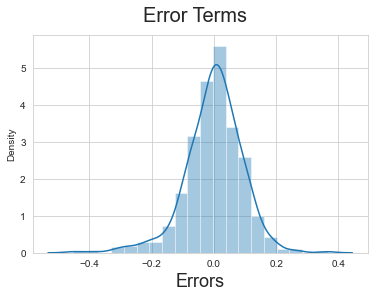

In [252]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   

# Making Predictions

##### Applying the scaling on the test set also

In [253]:
vars = ['windspeed' , 'temp' , 'humidity','count']
bikes_test[vars] = scaler.transform(bikes_test[vars])

#### Dividing into X_test and y_test

In [254]:
y_test = bikes_test.pop('count')
x_test = bikes_test

In [255]:
x_test_new = x_test[x_train_new.columns]
# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [256]:
#making predictions by using our model
y_pred = Linear_Regression.predict(x_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

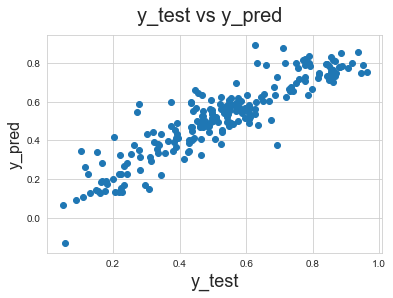

In [257]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

#### Obs: Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.

##### Calculate the R^2 Values of the test set

In [258]:
r2=r2_score(y_test, y_pred)
r2

0.8185144808197201

#### Calculating Adj. R-squared value for Test set

In [259]:
n = x_test_new.shape[0]      # n is number of rows in X_test_new
p = x_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new
# Calculating Adjusted R-squared value using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8079425088286358

#### Calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error

In [260]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07011239169604255
MSE: 0.008619801401041146
RMSE: 0.09284288557041485


#### Final Obs: From the above model ,we see that the Pvalues of all the 9 variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable High value for the F-Statistics means the model is more significant and vice-versa.

- F-statistic: 223.6
- Prob (F-statistic): 1.20e-184

The F-Statistics value of 223.6 (greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.

##### So we can conclude it as our final model with 9 variables .

`Model 8 is our final model with :`

##### R-squared for training set : 0.832 ( 83.2 %)

##### Adj R-squared for training set: 0.828 ( 82.8 %)

R-squared = 83.2 which means that 83.2 % of the variance for the target variable ie., 'count' is explained by the predictor variables , and hence we say that it is a good model.

From the coefficients that we get for the variables, our linear regression equation becomes:

Count = 0.2505 + 0.4693 X temp - 0.1482 X windspeed + 0.2335 X year_2019 - 0.0845 X month_Jul - 0.1122 X season_spring + 0.0464 X season_winter - 0.2810 X weather_light rain & snow - 0.0794 X weather_mist & cloudy - 0.0926 X holiday